In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_PM10_2021_12.csv")

In [3]:
X = dataframe[["time"]].values
Y = dataframe[["pm10"]].values

In [4]:
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1

In [5]:
all_models = {}
common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X, y)
clf = GradientBoostingRegressor(loss="quantile", **common_params)
clf.fit(X, y)
y_pred = clf.predict(X)

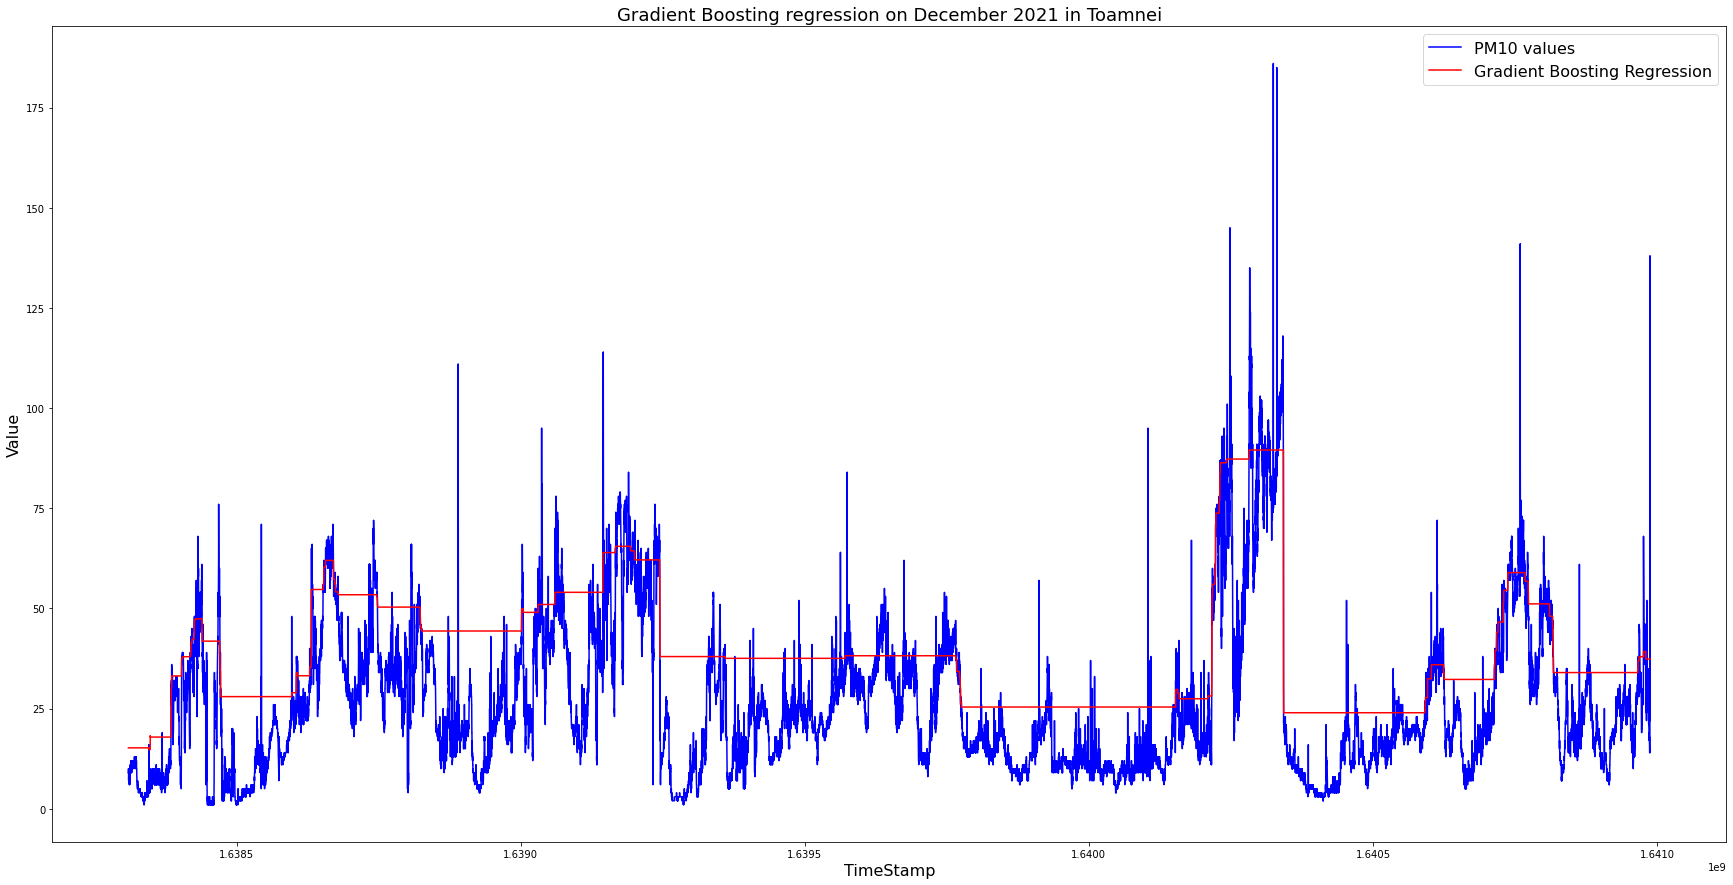

In [6]:
plt.figure(figsize=(30,15))
plt.plot(X, y, color='blue', label="PM10 values")
plt.plot(X, y_pred, color='red', label='Gradient Boosting Regression')
plt.title('Gradient Boosting regression on December 2021 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_Gradient-Boosting.jpg', bbox_inches = 'tight')
plt.show()
